In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('FrozenLake8x8-v0')

print("espacio", env.observation_space)
print("numero de acciones", env.action_space)

espacio Discrete(64)
numero de acciones Discrete(4)


In [ ]:
result = []
for i_episode in range(10):
  #reiniciamos el juego
  estado = env.reset()

  #generamos una accion aleatoria con el método sample que está entre 0 y 4
  accion = env.action_space.sample()

  #actualizamos el estado, el premio, fin e info con la accion que acabamos de tomar
  estado, premio, fin, info = env.step(accion)

  while (fin!=True): #mientras el juego no ha acabado
    accion = env.action_space.sample() 
    estado, premio, fin, info = env.step(accion)

  #ver en pantalla la posición final  
  env.render() 
  result.append(premio)
print(result)

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [4]:
# Creamos la tabla Q, matriz la cual tiene 64 estados y cada estado tiene 4 acciones.
Q = np.zeros([env.observation_space.n,env.action_space.n])

# tasa de aprendizaje
eta = .9

# factor de descuento
gma = .9

# numero de veces que se jugará para entrenar el modelo
epis = 5000

# calculo de premios por cada episodio
rev_list = [] 

for i in range(epis):
    # Reiniciar juego
    s = env.reset()
    rAll = 0 # premio total
    d = False # estado del juego
    j = 0 # movimientos máximos

    while j < 99:
        j+=1
        # Escogemos una acción de la tabla Q
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))

        # obtenemos los nuevos datos, estado, premio, estado del juego.
        s1,r,d,_ = env.step(a)

        # actualizamos la tabla según lo que más nos convenga, dejar el valor pasado o poner el valor actual
        Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])

        rAll += r # sumamos el premio total
        s = s1 # actualizamos el estado
        if d == True:
            break
    rev_list.append(rAll)
    env.render()
print("Reward Sum on all episodes ", str(sum(rev_list)/epis))

Se han truncado las últimas 5000 líneas del flujo de salida.
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FF

In [ ]:
# Reinicio del juego
s = env.reset()
d = False

while d != True:    
    # Escoger la acción con base a la tabla Q
    a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
    # actualizar las variables
    s1,r,d,_ = env.step(a)
    # actualizar la tabla Q con base en el nuevo resultado
    Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])
    s = s1
env.render()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


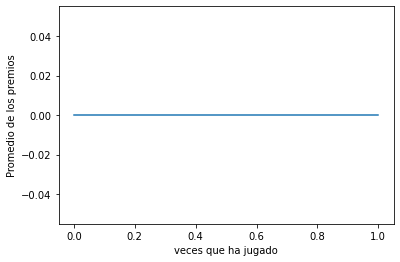

In [215]:
import matplotlib.pyplot as plt

x = [ i for i in range(len(rev_list))]

suma = rev_list[0]
y = [suma]
for i in range(1,len(rev_list)):
  suma += rev_list[i]
  prom = suma / i
  y.append(prom)

plt.plot(x, y)
plt.ylabel("Promedio de los premios")
plt.xlabel("veces que ha jugado")
plt.show()